In [75]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
diab = pd.read_csv('pima-indians-diabetes.csv') 

In [4]:
diab.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [74]:
diab.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

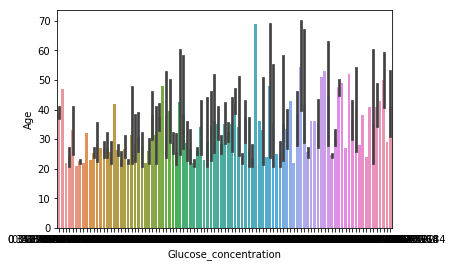

In [84]:
sns.barplot(y='Age',x='Glucose_concentration',data=diab.sample(n=250))

In [7]:
num_pred = tf.feature_column.numeric_column('Number_pregnant')
gluco_conc = tf.feature_column.numeric_column('Glucose_concentration')
blood_pre = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
inculin = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [29]:
group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=6)

In [33]:
len(diab['Group'].unique())

4

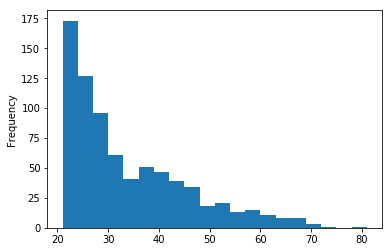

In [10]:
diab['Age'].plot(kind="hist",bins=20)

In [35]:
age_buck = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [44]:
diab.columns
nor = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [45]:
fec_cols = [num_pred,gluco_conc,blood_pre,triceps,inculin,pedigree,age_buck]

# Normalization Data

In [48]:
diab[nor] = diab[nor].apply(lambda x: (x - x.min())/ x.max() - x.min())
diab.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [49]:
from sklearn.model_selection import train_test_split
x_data = diab.drop('Class',axis=1)
lable = diab['Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_data, lable, test_size=0.3, random_state=101)

In [51]:
model = tf.estimator.LinearClassifier(feature_columns=fec_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0oy2ocj4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5a889b83c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [52]:
input_fun = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=1000, shuffle=True)

In [53]:
model.train(input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp0oy2ocj4/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 269.423
INFO:tensorflow:loss = 4.9562407, step = 101 (0.371 sec)
INFO:tensorflow:global_step/sec: 358.199
INFO:tensorflow:loss = 5.132001, step = 201 (0.279 sec)
INFO:tensorflow:global_step/sec: 337.531
INFO:tensorflow:loss = 7.447727, step = 301 (0.297 sec)
INFO:tensorflow:global_step/sec: 359.565
INFO:tensorflow:loss = 6.377303, step = 401 (0.279 sec)
INFO:tensorflow:global_step/sec: 354.099
INFO:tensorflow:loss = 3.9518104, step = 501 (0.279 sec)
INFO:tensorflow:global_step/sec: 339.244
INFO:tensorflow:loss = 3.8534474, step = 601 (0.297 sec)
INFO:tensorflow:global_step/sec: 342.998
INFO:tensorflow:loss

In [54]:
evel_model = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,shuffle=False)

In [55]:
model_eval = model.evaluate(evel_model,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-16-06:54:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0oy2ocj4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-16-06:54:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.7969959, auc_precision_recall = 0.6370123, average_loss = 0.5289847, global_step = 1000, label/mean = 0.35064936, loss = 5.091478, precision = 0.69491524, prediction/mean = 0.36251563, recall = 0.50617284


In [57]:
model_eval

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7969959,
 'auc_precision_recall': 0.6370123,
 'average_loss': 0.5289847,
 'label/mean': 0.35064936,
 'loss': 5.091478,
 'precision': 0.69491524,
 'prediction/mean': 0.36251563,
 'recall': 0.50617284,
 'global_step': 1000}

In [64]:
fe_cols = [num_pred,gluco_conc,blood_pre,triceps,inculin,pedigree,age_buck,group]

In [66]:
embed_group = tf.feature_column.embedding_column(group,dimension=1)
fe_cols = [num_pred,gluco_conc,blood_pre,triceps,inculin,pedigree,age_buck,embed_group]

In [67]:
dnn_model = tf.estimator.DNNClassifier([10,10,10,10],feature_columns=fe_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpez_3fo_7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5a46ce1dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
input_function = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=1000, shuffle=True,)

In [69]:
dnn_model.train(input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpez_3fo_7/model.ckpt.
INFO:tensorflow:loss = 7.122364, step = 1
INFO:tensorflow:global_step/sec: 301.388
INFO:tensorflow:loss = 5.53471, step = 101 (0.336 sec)
INFO:tensorflow:global_step/sec: 487.258
INFO:tensorflow:loss = 6.07654, step = 201 (0.205 sec)
INFO:tensorflow:global_step/sec: 331.283
INFO:tensorflow:loss = 6.877515, step = 301 (0.303 sec)
INFO:tensorflow:global_step/sec: 301.026
INFO:tensorflow:loss = 4.076558, step = 401 (0.332 sec)
INFO:tensorflow:global_step/sec: 335.71
INFO:tensorflow:loss = 7.9800906, step = 501 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.24
INFO:tensorflow:loss = 5.497758, step = 601 (0.300 sec)
INFO:tensorflow:global_step/sec: 339.789
INFO:tensorflow:loss = 3.5

In [71]:
eval_input = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
Dnn_eval = dnn_model.evaluate(eval_input,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-16-08:00:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpez_3fo_7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-16-08:01:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74891776, accuracy_baseline = 0.64935064, auc = 0.8391358, auc_precision_recall = 0.71967995, average_loss = 0.4751052, global_step = 1000, label/mean = 0.35064936, loss = 4.5728874, precision = 0.6619718, prediction/mean = 0.35041407, recall = 0.5802469


# Deep Network estimator

In [72]:
Dnn_eval

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8391358,
 'auc_precision_recall': 0.71967995,
 'average_loss': 0.4751052,
 'label/mean': 0.35064936,
 'loss': 4.5728874,
 'precision': 0.6619718,
 'prediction/mean': 0.35041407,
 'recall': 0.5802469,
 'global_step': 1000}

# LinearClassifier estimator

In [73]:
model_eval

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7969959,
 'auc_precision_recall': 0.6370123,
 'average_loss': 0.5289847,
 'label/mean': 0.35064936,
 'loss': 5.091478,
 'precision': 0.69491524,
 'prediction/mean': 0.36251563,
 'recall': 0.50617284,
 'global_step': 1000}